# 数据集

数据集为：https://www.kaggle.com/datasets/blastchar/telco-customer-churn

这个数据集是关于电信客户流失的，包含了一些客户信息以及他们是否流失的标签。下面是数据集中每个变量的内容：

1. **customerID**: 每个客户的唯一标识符。
2. **gender**: 客户的性别（男性或女性）。
3. **SeniorCitizen**: 客户是否是老年人（1表示是，0表示不是）。
4. **Partner**: 客户是否有配偶（Yes表示有，No表示没有）。
5. **Dependents**: 客户是否有家属（Yes表示有，No表示没有）。
6. **tenure**: 客户在公司中的停留时间（以月为单位）。
7. **PhoneService**: 客户是否有电话服务（Yes表示有，No表示没有）。
8. **MultipleLines**: 客户是否有多线电话服务（Yes表示有，No表示没有，'No phone service'表示没有电话服务）。
9. **InternetService**: 客户的互联网服务提供商（DSL、光纤或没有互联网服务）。
10. **OnlineSecurity**: 客户是否有在线安全服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
11. **OnlineBackup**: 客户是否有在线备份服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
12. **DeviceProtection**: 客户是否有设备保护服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
13. **TechSupport**: 客户是否有技术支持服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
14. **StreamingTV**: 客户是否有流媒体电视服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
15. **StreamingMovies**: 客户是否有流媒体电影服务（Yes表示有，No表示没有，'No internet service'表示没有互联网服务）。
16. **Contract**: 客户的合同类型（月度、年度或两年）。
17. **PaperlessBilling**: 客户是否选择电子账单（Yes表示选择，No表示不选择）。
18. **PaymentMethod**: 客户的支付方式（电子支票、邮寄支票、银行转账或信用卡）。
19. **MonthlyCharges**: 客户每月费用。
20. **TotalCharges**: 客户总费用。
21. **Churn**: 客户是否流失（Yes表示流失，No表示未流失）。

这些变量提供了关于客户特征、服务使用情况以及流失情况的信息，可用于分析客户流失的预测因素和趋势。

# 数据导入与处理

In [146]:
# 导入必备的库
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
# 导入数据集
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [148]:
# 查看一下
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
# 另一种查看方法
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


这里的目标变量是Churn，也就是顾客是否流失了。

pandas在读取数据集的时候，会对数据集中的变量的类型进行自动确定，但是结果不一定符合我们的需求：

In [150]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

首先是SeniorCitizen的值，应该是一个分类变量，只是用1和0来表示是老年人和不是老年人。接着是TotalCharges的值，这个值用来表示总金额，应该是浮点型float64而不是现在的object类型。

前面不难理解，后者可能是因为存在着缺失值导致的，缺失值不一定使用了NAN来进行表示，也可能是空格来进行表示了。

In [151]:
# 使用to_numeric()函数来进行转换
# 使用errors = 'coerce'来跳过报错，然后使用NaN值来进行替换
total_charges = pd.to_numeric(df.TotalCharges, errors = 'coerce')  # 跳过报错

In [152]:
# 使用 isnull() 方法来确定一下
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


可以发现缺失存在着空格。

采用的方法和第二章相同，就是直接将其设置为0。

In [153]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

然后是修改一下命名：

In [154]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

接着变量是churn：

In [155]:
df.churn = (df.churn == 'yes').astype(int)

如果churn的值为yes，则会返回True；否则则会返回False。

那么结果就可以转换为0和1，注意：计算机中1和0是和True和False对照，而不是和Yes和No对照。

In [156]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

可以发现0和1的值得到了转换。

在第二章的时候实现了一些函数，这些函数有着对应的功能，如果有一些功能是经常需要被使用到的，那么需要做的就是将其独立出来作为单独的模块，可以在需要的时候进行直接调用，而不是重复造轮子。

In [157]:
# 之后需要展示的一个东西
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [158]:
# 使用他人的模块
# 使用 sklearn 第三方库
from sklearn.model_selection import train_test_split
# 导入后进行使用
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)  # 数据集，测试机的大小，随机数的种子

为什么在实践中大多数情况下只将数据集拆分为训练集和测试集，而没有使用验证集。

这主要是因为在很多场景下，只使用训练集和测试集已经能够满足模型开发和评估的需求，而引入额外的验证集可能会增加复杂性并且不一定会带来显著的性能提升。以下是一些原因：

1. **数据量的充足性**: 在拥有足够大的数据集时，将数据集拆分为训练集和测试集就已经足够，因为训练集足够大可以很好地训练模型，而测试集足够大可以提供对模型性能的可靠评估。

2. **模型简单性**: 当使用简单的模型时，通常不需要进行太多的超参数调优或模型选择，因此验证集可能不是必需的。

3. **交叉验证的替代**: 在某些情况下，可以使用交叉验证来评估模型的性能，而不是使用额外的验证集。交叉验证可以更充分地利用数据，并且可以在不同的训练集和验证集上进行多次评估，从而得到更稳健的评估结果。

尽管在一些特定的场景下可能会使用验证集，但在许多情况下，只使用训练集和测试集已经足够简单而有效地进行模型开发和评估。

In [159]:
# 上面的代码的一个副作用
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


可以发现是乱序的，不是说不是连续的行的数据，而是index也没有按照从大到小或者从小到大来进行排序。

如果严格一些，我们可以将数据集拆分为三个子数据集，也就是增加一个validation数据集：

In [160]:
df_train, df_val = train_test_split(df_train_full,  # 从train的数据集中来进行拆分
                                    test_size = 0.33,  # 将1/3的数据集划分为train的数据集中的test部分，也就是validation
                                    random_state=11)  # 同样，设置随机数种子

# 然后是将目标变量提取出来
y_train = df_train.churn.values
y_val = df_val.churn.values

# 然后删除目标变量，确保训练和验证的过程中不会使用到目标变量
del df_train['churn']
del df_val['churn']

然后就是使用训练数据集来进行初步的探索了。

# 探索性数据分析

首先查看一下是否存在着其他的空置需要处理：

In [161]:
df_train_full.isnull().sum()  # .isnull()得到null为True的结果，然后使用sum()来获得所有的和，给出梅格列的总和

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

可以发现已经不存在缺失值了。

然后是查看一下churn的分布情况：

In [162]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

从结果来看，可以认为大部分顾客都是没有流失的。

In [163]:
df_train_full.churn.value_counts('0')

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

如此，可以算出来流失和没有流失的人的比例。

In [164]:
# 或者可以这么做
global_mean = df_train_full.churn.mean()

In [165]:
round(global_mean, 3)

0.27

客户流失率其实就是一个不平衡数据集的一个示例，没有流失的人是流失的人的3倍。

首先查看一下分类变量和数值变量的情况：

In [166]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

查看一下每个变量都有多少个值：

In [167]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

从结果来看，大部分的变量都是2个分类，只有1个是4个分类，这非常的好，因为不需要进行额外的处理。

接下来的探索就是分析那些特征对目标变量具有重要性。

从分类变量开始：查看每个变量的流失率。

可以查看所有的不同值，然后，对每个变啊零，都有一组客户：所有拥有此值的客户。对每个这样的分组，可以计算流失率，即分组流失率。当计算得到结果后，可以将它与总体流失率进行比较。

两种可能的结果：
- 比率之间非常的小：这个特征并不重要
- 比率之间非常的大：这个特征很重要，其中有一些特征导致了结果的差异较大

以gender变量为例子：

In [168]:
# gender有female和male两个变量
# female的数量
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
# male的数量
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

然后查看一下情况：

In [169]:
print(f"Female's customers' loss ratio: {female_mean}")
print(f"Male's customers' loss ratio: {male_mean}")

Female's customers' loss ratio: 0.27682403433476394
Male's customers' loss ratio: 0.2632135306553911


可以发现两者的差距并不大，而且和总体的流失率差距也不大，所以可以认为gender特征在区分是否流失上并不重要。

然后查看一下partner的情况：

In [170]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

In [171]:
print(partner_yes," ", partner_no)

0.20503330866025166   0.3298090040927694


可以发现两者之间存在着差距了，有partner的顾客比没有partner的顾客更加不容易流失。

除了查看分组比率和总体比率之间的差异，还可以观察它们之间的比率（指分组率和总体比率的比率）。

从统计学上来看，不同组的概率之间的比率称为风险率，其中风险是指产生影响的风险。

公式如下所示：风险 = 分组率 / 总体率

In [172]:
female_mean / 0.27

1.0252742012398663

可以发现，对于gender == female而言，流失的风险是1.02。

风险是一个介于0和无穷大之间的数字，这个数字可以告诉你分组中的元素与总体相比有多大的可能产生影响。

如果分组率和总体率之间的差异非常的小，那么风险会接近于1；即，该分组和其余的人群具有相同的风险水平。

我们可以对所有的分类变量都采用这个方法，因为需要重复相同的功能，所以我们使用函数来进行实现：

In [173]:
global_mean = df_train_full.churn.mean()  # 首先计算所有值为1，也就是流失率

In [174]:
global_mean

0.26996805111821087

In [175]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])  # groupby(by = )指按照什么来进行分组，agg(['mean']) 为计算平均值
df_group['diff'] = df_group['mean'] - global_mean  # 计算分组流失率与总体流失率之间的差值
df_group['risk'] = df_group['mean'] / global_mean  # 计算流失率

In [176]:
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


然后对所有的分类变量重复上述的操作：

In [177]:
from IPython.display import display   # 注意，这里是IPython而不是Ipython

for col in categorical:  # 便利所有的分类变量
    df_group = df_train_full.groupby(by = col).churn.agg(['mean'])  # 对每个变量执行分组操作，然后求取mean的值
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)  # 显示结果DataFrame

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


通过观察上述的DataFrame中的数据，可以找出来那些变量在churn变量上会有较为显著的影响。

从信息论的角度来讲：如果一个变量和目标变量之间的互信息值非常的高，那么这个分类变量对目标变量非常的重要；反之，则是无用的。

In [178]:
# sklearn中已经实现了mutual_info_score 函数
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn) # 接受一个 Pandas Series 作为输入，表示一个分类特征列，然后计算该特征与目标变量之间的互信息

df_mi = df_train_full[categorical].apply(calculate_mi)  # Pandas 的 apply 函数，将 calculate_mi 函数应用于 DataFrame 中的每一列（每个分类特征）
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


互信息是两个分类变量之间的依赖程度的方法，但是当其中的一个特征是数值型的时候，它就不起作用了。

但是如果分类是2分类的话，那么就是可以进行的，因为说白了2分类可以使用1和0来进行表示。

In [179]:
# 计算相关性
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

# 特征工程

在开始训练之前，需要执行的是特征工程：将所有分类变量转换为数值特征。

**分类变量的独热编码**

对分类变量进行独热编码的主要原因是，大多数机器学习模型无法直接处理字符串类型的分类变量，而需要将它们转换为数值型数据才能进行计算。

通常情况下，机器学习模型需要输入数值型数据进行训练和预测。因此，如果你的数据集包含分类变量，你需要对其进行编码以便模型能够理解。独热编码是一种常见的编码方法，它将一个具有多个水平的分类变量转换为多个二进制变量，每个变量表示一个水平是否存在。

举个例子，假设你有一个名为"颜色"的分类变量，它有三个水平："红色"、"绿色"和"蓝色"。使用独热编码后，你将得到三个新的二进制变量："颜色_红色"、"颜色_绿色"和"颜色_蓝色"。如果样本的颜色是红色，则"颜色_红色"变量为1，而其他两个变量为0。

通过这种方式，分类变量被转换为数值型数据，使得模型能够理解并处理它们。当然，并非所有模型都需要对分类变量进行独热编码，一些模型（如决策树、随机森林等）能够直接处理分类变量。但是，大多数线性模型（如逻辑回归、线性回归）、支持向量机等模型都需要对分类变量进行编码。

注意：

```python
在 R 语言中，一些模型可以自动处理分类变量，而无需手动进行独热编码。这取决于你使用的具体模型和分析函数。

例如，在使用线性回归（lm 函数）或逻辑回归（glm 函数）时，如果你将分类变量直接包含在模型中，R 会自动将其转换为虚拟变量（即进行独热编码）。这意味着你无需手动进行独热编码，模型会自动识别并处理分类变量。

但是，对于其他一些模型和函数，可能需要手动对分类变量进行独热编码，以便模型能够正确处理它们。例如，一些树模型（如决策树和随机森林）可能需要对分类变量进行编码，而另一些模型（如支持向量机）可能不需要。

总的来说，是否需要手动进行独热编码取决于你使用的具体模型和分析函数，以及它们对分类变量的处理方式。在使用模型之前，最好查阅相关文档或参考资料，以确保你的分类变量被正确处理。
```

对于Python语言而言：

```python
在 Python 中，一些机器学习库和模型可以自动处理分类变量，而无需手动进行独热编码。以下是一些常用库和模型的情况：

scikit-learn：scikit-learn 中的许多模型（如线性回归、逻辑回归、支持向量机等）可以处理包含分类变量的数据，而无需手动进行独热编码。在使用这些模型时，你可以直接将分类变量包含在特征矩阵中，scikit-learn 会自动将其转换为数值型数据。

Pandas：Pandas 库中的一些函数（如 `get_dummies`）可以用来进行独热编码。如果你需要手动进行独热编码，可以使用 Pandas 来实现。

其他库和模型：一些其他库和模型可能需要手动对分类变量进行独热编码，以便正确处理它们。例如，一些神经网络库（如 TensorFlow 和 PyTorch）通常需要对分类变量进行独热编码，而一些树模型（如 XGBoost 和 LightGBM）可以直接处理分类变量。

总的来说，是否需要手动进行独热编码取决于你使用的具体库和模型。在使用模型之前，最好查阅相关文档或参考资料，以确保你的分类变量被正确处理。
```

这里采用手动的方式来进行独热编码：

DictVectorizer函数可以接收一个字典并且对他进行向量化，然后将这些向量组合成一个矩阵的行，这个矩阵别用作机器学习算法的输入。

要使用这个方法，就需要将DataFrame转换为一个字典列表，这在Pandas中使用to_dict方法和"orient = 'records'"参数可以轻松的实现。

In [180]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')

可以查看一下：

In [181]:
train_dict[0]  # 查看一下第一个（也就是第0个内容）

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

接着开始进行转换：

In [182]:
from sklearn.feature_extraction import DictVectorizer

dv= DictVectorizer(sparse = False)  # sparse = False，这意味着矩阵不是稀疏的
dv.fit(train_dict)

DictVectorizer(sparse=False)

上面的代码创建了一个DictVectorizer实例，我们称为dv，并且通过fit方法来“训练”它。fit方法可以查看这些字典的内容并且找出每个变量的可能值，以及如何将它们映射到输出矩阵中的列。

如果一个特征是分类变量，那么就会采用独热编码方法，如果是数值特征，则会保持不变。

In [183]:
X_train = dv.transform(train_dict)  # 对象量化器进行匹配之后，可以使用transform方法将字典转换为矩阵
X_train[0]  # 查看第一行

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

可以发现大多数元素都是0或者1，这些其实都是独热编码的结果，另外的一些数字，比如说7.1000e+01, 6.0459e+03，则是数值型变量。

In [184]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

可以发现，对于分类变量而言，它为每个不同的值创建多个列，而对于数值型变量而言，则保持原有的变量。

# 机器学习之分类

这里使用逻辑回归来创建分类模型。

sigmoid 函数（也称为 logistic 函数）是一种常用的激活函数，常用于二分类问题中的逻辑回归模型。它的数学表达式如下：

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

其中，$x$ 是输入值，$\sigma(x)$ 是对输入值进行转换后的输出值，范围在 0 到 1 之间。

sigmoid 函数的特点如下：

1. **范围限制**：sigmoid 函数的输出范围在 0 到 1 之间，可以将输入的任意实数映射到一个概率值（0 到 1）范围内。因此，它常用于表示分类问题中的类别概率。

2. **连续可导**：sigmoid 函数在整个实数域上都是连续可导的，这使得它可以用于梯度下降等优化算法中。

3. **单调递增**：sigmoid 函数是单调递增的，即当输入增大时，输出也会增大。

4. **饱和性**：在输入值较大或较小时，sigmoid 函数的导数会趋于 0，这意味着它在极端值附近的梯度会很小，容易导致梯度消失或梯度爆炸问题。

sigmoid 函数通常用于逻辑回归模型中，将线性模型的输出转换为 0 到 1 之间的概率值，然后根据阈值进行分类预测。sigmoid 函数在神经网络中的隐藏层也可以用作激活函数，但由于其存在梯度消失的问题，近年来被更复杂的激活函数（如 ReLU）所取代。

In [185]:
# linear_regression的实现
def linear_regression(xi):
    result = bias

    for j in range(n):
        result = result + xi[x] * w[j]
    
    return result

In [186]:
# 首先定义一下sigmoid
import math

def sigmoid(score):
    return 1 / (1 + math.exp(-score))

In [187]:
# 对linear_regression函数的转换，获得sigmoid函数
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob

在应用sigmoid函数之前，用score表示中间结果。

幸运的是，在sklearn中已经可以使用他人开发好的模型训练：

In [188]:
from sklearn.linear_model import LogisticRegression  # 首先导入逻辑回归模型

In [189]:
# 然后使用fit方法来进行训练
model = LogisticRegression(solver = 'liblinear', random_state = 1)  # solver是一个底层库，这里指定是为了能够之后进行重现
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

默认情况之下，C的值为1.0，这里没有指定，那就是1.0。

In [190]:
# 将模型应用到验证集当中，然后查看性能
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')  # 使用与训练时候完全相同的方式进行独热编码
X_val = dv.transform(val_dict)  # 使用之前训练好的变换，而不是先训练再变换

得到了一个包含验证数据集特征的矩阵X_val，现在可以将这个矩阵放入到模型中，可以使用模型的predict_proba方法：

In [191]:
X_val

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.90000e+01, 1.28605e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.90000e+01, 1.88865e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.10000e+01, 4.90575e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.40000e+01, 2.94500e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 3.56650e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.40000e+01, 9.38650e+02]])

In [192]:
y_pred = model.predict_proba(X_val)

In [193]:
y_pred

array([[0.76508893, 0.23491107],
       [0.7311339 , 0.2688661 ],
       [0.6805482 , 0.3194518 ],
       ...,
       [0.94274725, 0.05725275],
       [0.38476961, 0.61523039],
       [0.93872737, 0.06127263]])

第一列是目标为0的顾客，也就是不会流失的顾客；第二列则是会流失的顾客的概率。

In [194]:
y_pred = model.predict_proba(X_val)[:, 1]  # 但是只需要使用第二列就可以了

In [195]:
y_pred

array([0.23491107, 0.2688661 , 0.3194518 , ..., 0.05725275, 0.61523039,
       0.06127263])

这是一种软预测，因为结果显示的是顾客流失的概率在0和1之间的值。

如果一个顾客的流失概率高，那么这个顾客需要被想办法进行挽留；但是每个顾客都有流失的可能性，所以如果选择给每个顾客打电话或者进行促销，那么公司可能会反过来蒙受损失。

In [196]:
# 选择一个值，0.5，作为分水线
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

就可以将所有的高于了这个数字的概率认为是会流失的，反之则是不会流失的。

In [197]:
# 将结果写到churn数组中
churn = y_pred >= 0.5

In [198]:
churn

array([False, False, False, ..., False,  True, False])

现在要做的是，评估一下模型的性能。

这里一个简单的方法是：将预测的结果和每个真实的结果进行比较，然后得到一个重合率。

In [199]:
(y_val == churn).mean()

0.8016129032258065

在这段代码中，`(y_val == churn)` 这部分会返回一个布尔值的 Series，其中每个元素表示对应位置的预测值是否等于真实值。然后，`.mean()` 方法会计算这个布尔值 Series 的均值，由于 Python 中布尔值 `True` 在计算时会被视为 1，`False` 会被视为 0，因此这个均值实际上等于正确预测的比例，也就是模型的准确度。

举个例子，假设 `y_val` 是真实的分类标签，`churn` 是模型的预测结果，那么 `(y_val == churn)` 就会生成一个布尔值的 Series，例如 `[True, False, True, True, True]`。然后，`.mean()` 方法会计算这个 Series 中所有值的平均值，即 `(1 + 0 + 1 + 1 + 1) / 5 = 0.8`，这个值就是准确度。

这种方法之所以有效，是因为准确度的定义是正确预测的样本数量占总样本数量的比例，而布尔值的均值实际上等于 1 出现的频率，因此可以用来直接计算准确度。

**对模型的解释**

In [200]:
# 从 0 中得到偏置项
model.intercept_[0]

-0.12198863589816404

In [201]:
# 从 coef_[0] 中得到相关性系数
model.coef_[0]

array([ 5.63352013e-01, -8.59109588e-02, -5.99429690e-01, -3.02784218e-02,
       -9.17102141e-02,  9.99297896e-02, -1.15869912e-01, -1.06048514e-01,
       -2.73675450e-02, -9.46210909e-02, -3.23345457e-01,  3.17226733e-01,
       -1.15869912e-01,  7.84207767e-04, -1.68099103e-01,  1.27132808e-01,
       -8.10223411e-02,  1.35702678e-01, -1.15869912e-01, -1.41821402e-01,
        2.57855836e-01, -1.15869912e-01, -2.63974560e-01, -2.12616482e-01,
        9.06278461e-02, -4.80213556e-02, -7.39672803e-02, -2.66756128e-02,
       -1.36243725e-01,  1.74743449e-01, -1.33812747e-01,  1.27132808e-01,
       -2.49121444e-01,  2.97088422e-01, -8.48576290e-02, -1.15869912e-01,
        7.87389051e-02, -9.90736625e-02, -1.15869912e-01,  9.29549385e-02,
        1.78137960e-01, -1.15869912e-01, -1.84256684e-01, -6.94867353e-02,
        4.47688438e-04])

但是这些只是一个数字数组，这样是令人难以理解的。

In [202]:
# 进行关联
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


为了理解，可以使用一个更小的特征集来进行模型训练，用来说明：

In [203]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [204]:
# 这里所使用到的特征（包括生成的）
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

然后进行模型训练：

In [205]:
model_small = LogisticRegression(solver = 'liblinear', random_state = 1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [206]:
model_small.intercept_[0]  # 偏置项

-0.577229912199359

In [207]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

偏置项是：-0.58，这意味着：

当输入为 -0.58 时，sigmoid函数的值为: 0.35893259366518293


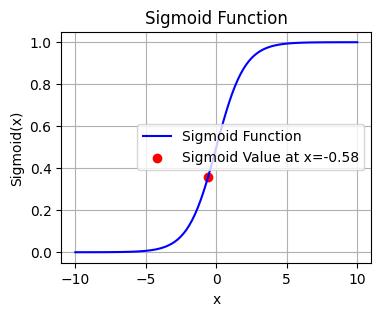

In [208]:
import numpy as np
import matplotlib.pyplot as plt

# 定义sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 计算输入为 -0.58 时sigmoid函数的值
x = -0.58
sigmoid_value = sigmoid(x)

# 打印结果
print("当输入为 -0.58 时，sigmoid函数的值为:", sigmoid_value)

# 可视化sigmoid函数
x_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x_values)

plt.figure(figsize=(4, 3))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.scatter(x, sigmoid_value, color='red', label=f'Sigmoid Value at x={x}')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

偏置项为负号的原因在于：目标变量的分类是不平衡的，没有流失的顾客的数量是流失的顾客的数量的3倍左右。

另外的几个特征的权重为：
```python
{
    'contract=month-to-month': 0.866,
    'contract=one_year': -0.327,
    'contract=two_year': -1.117,
    'tenure': -0.094,
    'totalcharges': 0.001
}
 ```
如果一个特征的权重为负，则意味着这个特征为热（1）的时候会导致顾客流失的可能性下降XXX；反之，则是上升XXX。

**使用模型**

同样要采用预处理：

In [209]:
# 一个例子

customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [210]:
X_test = dv.transform([customer])

In [211]:
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [212]:
model.predict_proba(X_test)[0, 1]

0.07332239057816664

从预测的结果来看，这个顾客的流失率只有0.073，概率非常的低，会被判决到False当中。

In [213]:
# 另外一个顾客的信息
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321649550627843

这个顾客则需要被想办法保留。